<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Review CLT, Confidence Intervals, and Hypothesis Testing

_Authors: Matt Brems (DC)_

---

### Read in the housing data (code provided).


In [1]:
import urllib
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
urllib.urlretrieve(data_url, "/Users/Mahendra/desktop/GA/hw/3.3.2_statistics-review_clt_confidence_hypothesis_testing-lab/datasets/housing.data")

names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]

import pandas as pd
data = pd.read_csv("/Users/Mahendra/desktop/GA/hw/3.3.2_statistics-review_clt_confidence_hypothesis_testing-lab/datasets/housing.data", header=None, names=names, delim_whitespace=True)

NOX = data['NOX'].values
AGE = data['AGE'].values

### 1. Find the mean, standard deviation, and the standard error of the mean for variable `AGE`

In [5]:
import numpy as np
import scipy.stats

In [7]:
# A:
mean=np.mean(AGE)
SD=np.std(AGE)
Std_err=scipy.stats.sem(AGE)
print "mean:",mean
print "SD:", SD
print "standard error" , Std_err

mean: 68.5749011858
SD: 28.1210325702
standard error 1.25136952526


In [13]:
# calculating Standrard error using formula
scale=np.std(AGE, ddof = 1)/len(AGE)**0.5
scale

1.2513695252583041

### 2. Generate a 90%, 95%, and 99% confidence interval for `AGE`

You can use the `scipy.stats.t.interval` function to calculate confidence interval range.

```python
# Endpoints of the range that contains alpha percent of the distribution
stats.t.interval(alpha, df, loc=0, scale=1)	
```

Arguments:
- `df` = the degrees of freedom, will be the length of the vector -1.
- `loc` = the mean of the t-distribution (your point estimate - mean of the variable)
- `scale` = the standard deviation of the t-distribution (the standard error of your sample mean)

**Interpret the results from all three confidence intervals.**

In [8]:
from scipy.stats import t

In [18]:
# A:90%
interval_90=scipy.stats.t.interval(0.9, len(AGE)-1, np.mean(AGE), scipy.stats.sem(AGE))
print " The 90% confidence interavl for AGE is between " + str(interval_90[0]) + "and" +str(interval_90[1])

 The 90% confidence interavl for AGE is between 66.512798667and70.6370037045


In [19]:
#95%
interval_95=scipy.stats.t.interval(0.95, len(AGE)-1, np.mean(AGE), scipy.stats.sem(AGE))
print " The 95% confidence interavl for AGE is between " + str(interval_95[0]) + "and" +str(interval_95[1])

 The 95% confidence interavl for AGE is between 66.1163697185and71.033432653


In [20]:
#99%
interval_99=scipy.stats.t.interval(0.99, len(AGE)-1, np.mean(AGE), scipy.stats.sem(AGE))
print " The 99% confidence interavl for AGE is between " + str(interval_99[0]) + "and" +str(interval_99[1])

 The 99% confidence interavl for AGE is between 65.3393604183and71.8104419532


In [22]:
#ppf is percent point function.. inverse of CDF
critical_t = t.ppf(0.995,506)
## Recall that a 99% t confidence interval will be of the form
## (x-bar - t * s/sqrt(n), x-bar + t * s/sqrt(n))
## where t is the critical t-value with 506 degrees of freedom
## and for 99% confidence.
critical_t

2.5855804006393113

### 3. Did you rely on the Central Limit Theorem in question 2? Why or why not? Explain.

(array([  14.,   31.,   29.,   42.,   32.,   38.,   39.,   42.,   71.,  168.]),
 array([   2.9 ,   12.61,   22.32,   32.03,   41.74,   51.45,   61.16,
          70.87,   80.58,   90.29,  100.  ]),
 <a list of 10 Patch objects>)

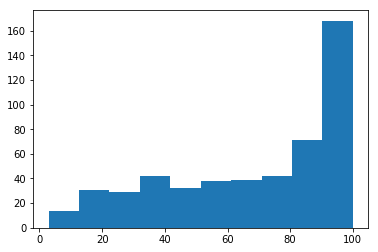

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(AGE)

# A:Yes becaouse we dont know whether age  is normally distributed

### 4. For variable `NOX`, generate a 95% confidence interval and interpret it.

In [30]:
# A:
import scipy.stats
stand_error=scipy.stats.sem(NOX)
NOX_95_conf=scipy.stats.t.interval(0.95,len(NOX)-1,np.mean(NOX),stand_error)
print " For NOX 95% confidence is between" +str(NOX_95_conf[0]) + "and "+ str(NOX_95_conf[1])

 For NOX 95% confidence is between0.544574262292and 0.564815856285


### 5. For the variable `NOX`, test the hypothesis that the mean is equal to the median. 

You may use scipy functions to complete this, but complete all steps - define hypotheses, etc. Let alpha = 0.05. Interpret your results.

In [42]:
# A:1. define hypotesis
#H0: mean= median
#H1: mean!=median

# 2. alpha
alpha= 0.05
print "alpha:" ,alpha

#3. claculate t_statstics
t_statastics= (np.mean(NOX)-np.median(NOX))/(scipy.stats.sem(NOX))
print "t_statastics:" ,t_statastics

#4. p_value
p_value=t.sf(np.abs(t_statastics), len(NOX)) * 2
print "p_value:" , p_value

if p_value<alpha:
    print "we reject null hypoteses that mean is not equal to median"
elif p_value>alpha:
    print " we fail to reject null hypoteses that mean is not equal to median"
else:
    print " The results are inconclusive"

alpha: 0.05
t_statastics: 3.24088371678
p_value: 0.00127005273618
we reject null hypoteses that mean is not equal to median


### 6. What do you notice about the results from Exercise 4 and Exercise 5? 

**If you were going to generalize this to the relationship between hypothesis tests and confidence intervals, what might you say? Be specific.**

In [9]:
# A:

### 7. For the variable `NOX`, test the hypothesis that the mean is greater than or equal to the median. 

You may use scipy functions to complete this, but complete all steps - define hypotheses, etc. Let alpha = 0.05. Interpret your results.

In [10]:
# A:

### 8. Compare the p-values from Exercise 5 and Exercise 7. What do you notice?

In [11]:
# A: